# Machine learning Final Project

In [1]:
# Submitted to: Dr. Sujata
# Submitted by: 19CSU003 -Aastha
#               19CSU215 -Prakhar
#               19CSU219 -Prashant

In [2]:
#Date of submission : 24/11/2021

# PROBLEM STATEMENT 
The Breast Cancer dataset. This is another famous dataset with the interesting task to predict if a cancer cell is good or bad (or in medical terms: malignant or benign). Here we have 30 different features for each cancer cell that have been computed from medical images. As algorithm I recommend to try out the Logistic Regression model. This is similar to the Linear Regression model in the beginning. Don't be confused by the name, because even though it has Regression in its name, it is actually used for a classification task. The Logistic Regression algorithm also models a continuous value, but this is a probability value between 0 and 1 and can therefore be used for classification. I also recommend to have a look at another new technique that is called feature standardization. Because the 30 different features may have values in different ranges, and this might confuse the model a little bit. So play around with feature standardization here and see if you can improve your model even further with that. (Note: Feature standardization is not required for Logistic Regression,KNN,Decision Tree but it's still an important technique and can be important for other classifier here.

# Lab12 
17th
November 2021

# 19csu003

# Implementing Decision Tree-Breast Cancer dataset

LIBRARIES IMPORT

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT DATASET

In [15]:
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Preprocesssing

In [18]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [19]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [20]:
df.isnull().sum().sum()

569

In [27]:
df.notnull()
df = df.drop(['Unnamed: 32'],axis =1)

In [25]:
# newDf = df.dropna()
# newDf = df.interpolate(limit_area="inside")

In [29]:
newDf=df

In [11]:
newDf.notnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [14]:
# newDf.interpolate()
# newDf['smoothness_mean'].fillna(newDf['smoothness_mean'].mean(),inplace=True)
# newDf['concave points_mean'].fillna(newDf['concave points_mean'].mean(),inplace=True)
# newDf['concavity_mean'].fillna(newDf['concavity_mean'].mean(),inplace=True)
# newDf['smoothness_mean'].fillna(newDf['smoothness_mean'].mean(),inplace=True)
# newDf['smoothness_mean'].fillna(newDf['smoothness_mean'].mean(),inplace=True)

In [15]:
newDf.isnull().sum().sum()

0

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

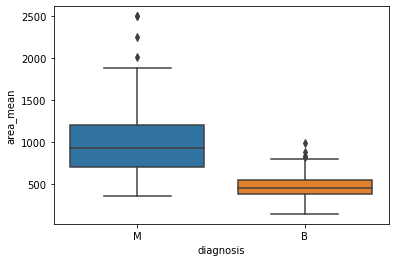

In [16]:
import seaborn as sns
sns.boxplot(x='diagnosis', y='area_mean', data=df)

AxesSubplot(0.125,0.125;0.62x0.755)


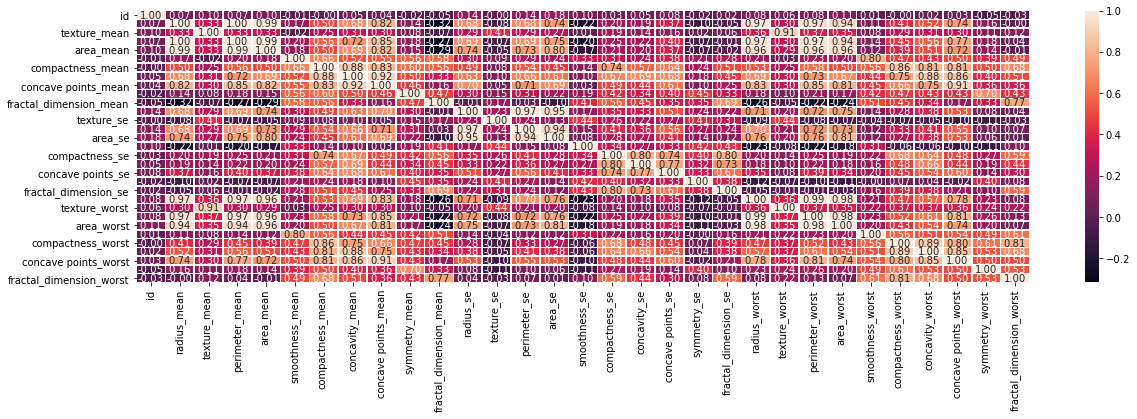

In [17]:
corr=newDf.corr()
plt.figure(figsize=(20,5))
print(sns.heatmap(corr,annot=True,fmt=".2f",linewidths=.5))

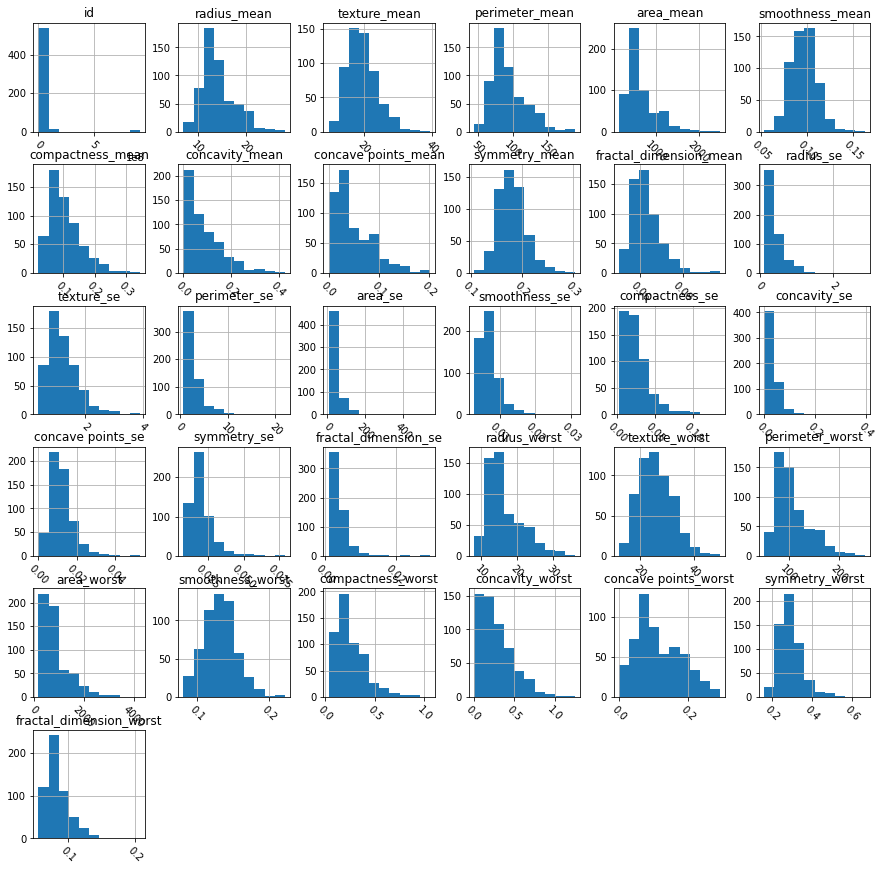

In [18]:
# Plot histogram grid
newDf.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

Number of patients with malignant:  353
Number of patients that are benign:  209


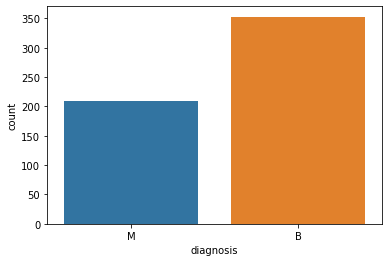

In [19]:
sns.countplot(data=newDf, x = 'diagnosis', label='Count')

M, B = newDf['diagnosis'].value_counts()
print('Number of patients with malignant: ',M)
print('Number of patients that are benign: ',B)

In [20]:
# get the correlation
newDf.iloc[:,1:32].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.327907,0.997866,0.987328,0.168079,0.504481,0.676104,0.822661,0.142818,-0.317335,...,0.969590,0.297598,0.965868,0.941014,0.110830,0.408751,0.522933,0.741203,0.155117,-0.003169
texture_mean,0.327907,1.000000,0.334206,0.325414,-0.021413,0.247312,0.311772,0.302106,0.077802,-0.070684,...,0.360801,0.912108,0.368008,0.352965,0.077800,0.285799,0.307079,0.302331,0.112430,0.123450
perimeter_mean,0.997866,0.334206,1.000000,0.986593,0.204504,0.555188,0.715287,0.850892,0.177869,-0.267405,...,0.969300,0.303933,0.970802,0.941284,0.141563,0.450812,0.559745,0.768223,0.179690,0.040756
area_mean,0.987328,0.325414,0.986593,1.000000,0.176135,0.498477,0.686440,0.824269,0.147338,-0.287396,...,0.963064,0.288749,0.960269,0.959517,0.116902,0.386936,0.509683,0.720001,0.135839,-0.005043
smoothness_mean,0.168079,-0.021413,0.204504,0.176135,1.000000,0.656283,0.519367,0.551753,0.558061,0.584004,...,0.208500,0.034030,0.233430,0.203312,0.803072,0.466483,0.431019,0.500245,0.389566,0.493948
compactness_mean,0.504481,0.247312,0.555188,0.498477,0.656283,1.000000,0.881839,0.828851,0.598201,0.562274,...,0.530281,0.252974,0.584415,0.504931,0.558734,0.862597,0.814260,0.813847,0.498683,0.683002
concavity_mean,0.676104,0.311772,0.715287,0.686440,0.519367,0.881839,1.000000,0.920173,0.496700,0.332408,...,0.685442,0.304312,0.726137,0.673343,0.442884,0.750295,0.882278,0.860463,0.398601,0.509452
concave points_mean,0.822661,0.302106,0.850892,0.824269,0.551753,0.828851,0.920173,1.000000,0.458097,0.160389,...,0.828589,0.296346,0.853744,0.807923,0.446128,0.661114,0.748207,0.908924,0.364605,0.359507
symmetry_mean,0.142818,0.077802,0.177869,0.147338,0.558061,0.598201,0.496700,0.458097,1.000000,0.474844,...,0.178212,0.095434,0.210952,0.169676,0.423697,0.466826,0.429855,0.426365,0.695679,0.432259
fractal_dimension_mean,-0.317335,-0.070684,-0.267405,-0.287396,0.584004,0.562274,0.332408,0.160389,0.474844,1.000000,...,-0.262950,-0.047150,-0.215613,-0.240777,0.505811,0.454991,0.344026,0.170736,0.327644,0.767341


<AxesSubplot:>

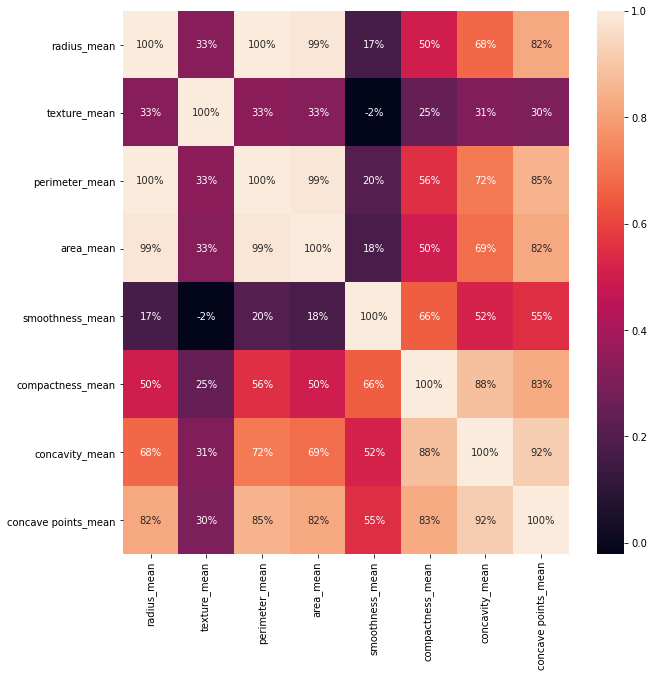

In [21]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(newDf.iloc[:,1:10].corr(),annot=True,fmt=".0%")

 Label encoding

In [30]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
# Y = newDf["diagnosis"]
newDf["diagnosis"] = labelencoder_Y.fit_transform(newDf["diagnosis"])

In [31]:
newDf

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Linear Assumptions

In [24]:
from sklearn.preprocessing import StandardScaler
newDf12=newDf
# newDf12 = df.dropna(axis = 1)
newDf12.concavity_mean
# newDf12

2      0.19740
3      0.24140
4      0.19800
5      0.15780
6      0.11270
        ...   
564    0.24390
565    0.14400
566    0.09251
567    0.35140
568    0.00000
Name: concavity_mean, Length: 562, dtype: float64

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = newDf12.drop(['concavity_mean'],axis=1)
y = newDf12.concavity_mean
sc = StandardScaler()
X = sc.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.3)



# x = newDf12.drop(["concavity_mean"],axis=1)
# y = newDf12.concavity_mean

regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9869123593699409


In [26]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
# Y = newDf["diagnosis"]
newDf12["diagnosis"] = labelencoder_Y.fit_transform(newDf12["diagnosis"])

<ipython-input-26-158ed2d209c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf12["diagnosis"] = labelencoder_Y.fit_transform(newDf12["diagnosis"])


In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x = newDf12.drop(['concavity_mean'],axis=1)
y = newDf12.concavity_mean
sc = StandardScaler()
X = sc.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.3)



# x = newDf12.drop(["concavity_mean"],axis=1)
# y = newDf12.concavity_mean



In [28]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9869123593699409


# Mean of Residuals

In [29]:
# Residuals as we know are the differences between the true value and the predicted value. 
# assumptions of linear regression==> mean of the residuals=0.

In [30]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# output is close to zero in exponential

Mean of Residuals -8.616234669482767e-18


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


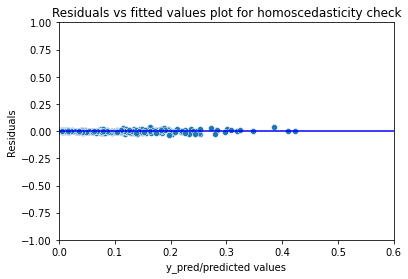

In [31]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,0.6)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


# The second plot shows the mean residual doesn't change with the fitted values (and so is doesn't change with x), but the spread
# of the residuals (and hence of the y's about the fitted line) is increasing as the fitted values (or x) changes. 
#                   That is, the spread is not constant. Heteroskedasticity.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


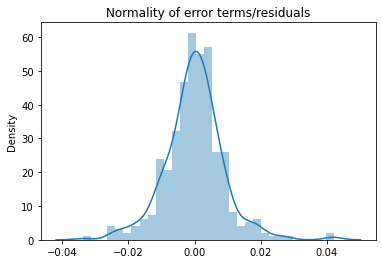

In [32]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


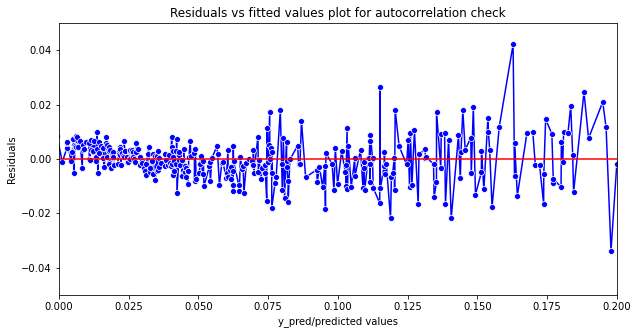

In [33]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.05,0.05)
plt.xlim(0,0.2)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

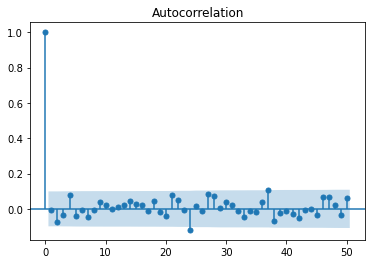

In [34]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=50)
plt.show()

# Linear Regression

In [33]:
abc=newDf['concavity_mean']

In [34]:
X=pd.DataFrame(abc)

In [35]:
X

,concavity_mean
0,0.30010
1,0.08690
2,0.19740
3,0.24140
4,0.19800
...,...
564,0.24390
565,0.14400
566,0.09251
567,0.35140


In [36]:
abc1=newDf['concave points_mean']

In [37]:
y=pd.DataFrame(abc1)

In [38]:
y

,concave points_mean
0,0.14710
1,0.07017
2,0.12790
3,0.10520
4,0.10430
...,...
564,0.13890
565,0.09791
566,0.05302
567,0.15200


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)

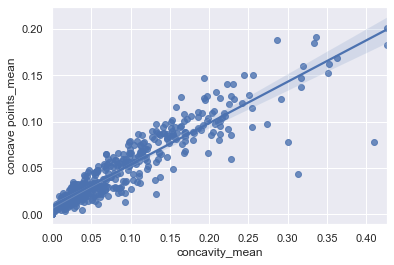

In [44]:
import seaborn as sns
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['concavity_mean'] = X_train['concavity_mean']
dataframe_training['concave points_mean'] = y_train
ax = sns.regplot(x="concavity_mean", y="concave points_mean", data= dataframe_training)

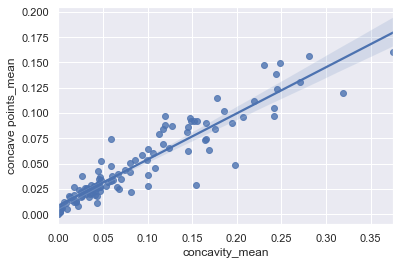

In [45]:
dataframe_test = pd.DataFrame()
dataframe_test['concavity_mean'] = X_test['concavity_mean']
dataframe_test['concave points_mean'] = y_test
ax = sns.regplot(x="concavity_mean", y="concave points_mean", data= dataframe_test)

In [46]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[0.44569303]]
Intercept: 
 [0.009285]


In [47]:
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 0.0001976758245727712


In [48]:
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Variance score: 0.868533463191555


# Plynomial Regression

In [49]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1) 

In [50]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
 

LinearRegression()

In [51]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 5) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression()

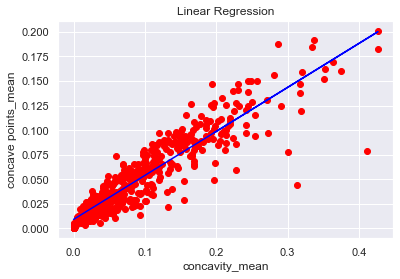

In [52]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('concavity_mean')
plt.ylabel('concave points_mean')
plt.show()

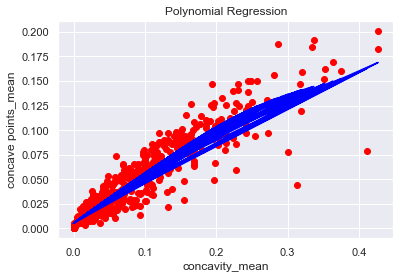

In [53]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('concavity_mean')
plt.ylabel('concave points_mean')
plt.show()

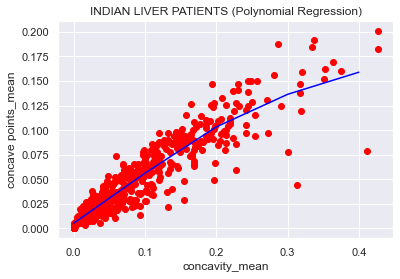

In [54]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('CANCER PATIENTS (Polynomial Regression)')
plt.xlabel('concavity_mean')
plt.ylabel('concave points_mean')
plt.show()

In [55]:
linear_regressor.predict(np.array(6.5).reshape(-1, 1))

array([[2.91856914]])

In [56]:
linear_regressor_2.predict(polynomial_regressor.fit_transform(np.array(6.5).reshape(-1, 1)))

array([[359703.75799162]])

In [57]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5)

In [58]:
X_pf=pf.fit_transform(X)
lr=LinearRegression()

In [59]:
lr.fit(X_pf,y)
pred=lr.predict(X_pf)

In [60]:
rmse=np.sqrt(mean_squared_error(y,pred))
r2=r2_score(y,pred)
print(rmse)
print(r2)

0.014527809826246756
0.8583368711169659


In [61]:
# X_train_poly.shape, X_test_poly.shape

In [62]:
# lr = LinearRegression()
# lr.fit(X_train_poly, y_train)

In [63]:
# lr.score(X_test_poly, y_test)

In [64]:
# y_pred = lr.predict(X_test_poly)
# np.round(y_pred)

In [65]:
# y_test

In [66]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
 
# mse, rmse

SPLITING DATASET TO TRAIN AND TEST

In [42]:
#Splitting Dataset
X = newDf.drop("diagnosis",axis = 1)
y = newDf["diagnosis"]

In [43]:
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (569, 31)
Shape of y =  (569,)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (455, 31)
Shape of y_train =  (455,)
Shape of X_test =  (114, 31)
Shape of y_test =  (114,)


In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [46]:
# Logistic Regression ML Model Training
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
# Score using feature Scaling
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [48]:
lr.score(X_test_sc, y_test)

0.9473684210526315

In [74]:
lr.predict(X_test_sc)

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1], dtype=int64)

In [49]:
y_test

169    0
137    0
188    0
443    0
345    0
      ..
538    0
123    0
224    0
115    0
425    0
Name: diagnosis, Length: 114, dtype: int32

In [50]:
y_pred = lr.predict(X_test_sc)
y_pred.shape
y_pred2 = lr.predict(X_train)

In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [78]:
print('MSE = ', mse)
print('RMSE = ', rmse)

MSE =  0.02654867256637168
RMSE =  0.1629376339780705


In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8923809523809524

In [116]:
# patient1 = X_test[10,2:]
# patient1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.5575221238938053

In [62]:
patient1 = [2,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758]

In [82]:
patient1 = np.array([patient1])
patient1

array([[2.000e+00, 1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01,
        1.599e-01, 1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01,
        7.869e-01, 4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02,
        2.058e-02, 2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02,
        1.709e+03, 1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01,
        8.758e-02]])

In [83]:
pred = lr.predict(patient1)

In [84]:
if pred[0] == 1:
    print('Patient has Cancer (malignant)')
else:
    print('Patient has Cancer ( benign)')

Patient has Cancer (malignant)


# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier


In [52]:
# We use criterion Gini
classifier = DecisionTreeClassifier(criterion='gini')

In [53]:
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [54]:
classifier.score(X_test, y_test)

0.9385964912280702

In [55]:
# Criterion using entropy
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
classifier_entropy.score(X_test, y_test)

0.9035087719298246

In [57]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,13.54,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,...,15.11,19.26,99.70,711.2,0.1440,0.17730,0.23900,0.12880,0.2977,0.07259
420,906539,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.3035,0.08284
106,863031,11.64,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.034850,0.1801,...,13.14,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097
488,913512,11.68,16.17,75.49,420.5,0.11280,0.09263,0.042790,0.031320,0.1853,...,13.32,21.59,86.57,549.8,0.1526,0.14770,0.14900,0.09815,0.2804,0.08024
522,91789,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,901041,13.30,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,...,14.20,29.20,92.94,621.2,0.1140,0.16670,0.12120,0.05614,0.2637,0.06658
436,908916,12.87,19.54,82.67,509.2,0.09136,0.07883,0.017970,0.020900,0.1861,...,14.45,24.38,95.14,626.9,0.1214,0.16520,0.07127,0.06384,0.3313,0.07735
528,918192,13.94,13.17,90.31,594.2,0.12480,0.09755,0.101000,0.066150,0.1976,...,14.62,15.38,94.52,653.3,0.1394,0.13640,0.15590,0.10150,0.2160,0.07253
485,913063,12.45,16.41,82.85,476.7,0.09514,0.15110,0.154400,0.048460,0.2082,...,13.78,21.03,97.82,580.6,0.1175,0.40610,0.48960,0.13420,0.3231,0.10340


In [58]:
classifier_sc = DecisionTreeClassifier(criterion='gini')
classifier_sc.fit(X_train_sc, y_train)

classifier_sc.score(X_test_sc, y_test)

0.9385964912280702

In [60]:
# Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9210526315789473

In [64]:
# pred2 = classifier.predict(patient1)

In [112]:
if pred2[0] == 1:
    print('Patient has Cancer (malignant)')
else:
    print('Patient has Cancer ( benign)')

Patient has Cancer (malignant)


# decision tree visual

In [68]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [84]:
iris = datasets.load_breast_cancer()
# newDf = ()
X = newDf.drop("diagnosis",axis = 1)
y = newDf["diagnosis"]


In [80]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

 TEXT REPRESENTATION OF DECISION TREE  

In [81]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_21 <= 16.80
|   |--- feature_28 <= 0.14
|   |   |--- feature_13 <= 6.60
|   |   |   |--- feature_14 <= 38.60
|   |   |   |   |--- feature_15 <= 0.00
|   |   |   |   |   |--- feature_28 <= 0.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_28 >  0.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_15 >  0.00
|   |   |   |   |   |--- feature_22 <= 33.27
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_22 >  33.27
|   |   |   |   |   |   |--- feature_22 <= 33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_22 >  33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_14 >  38.60
|   |   |   |   |--- feature_14 <= 39.15
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  39.15
|   |   |   |   |   |--- feature_16 <= 0.01
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_16 >  0.01
|   |   |   |   |   |   |--- class: 0
|   |  

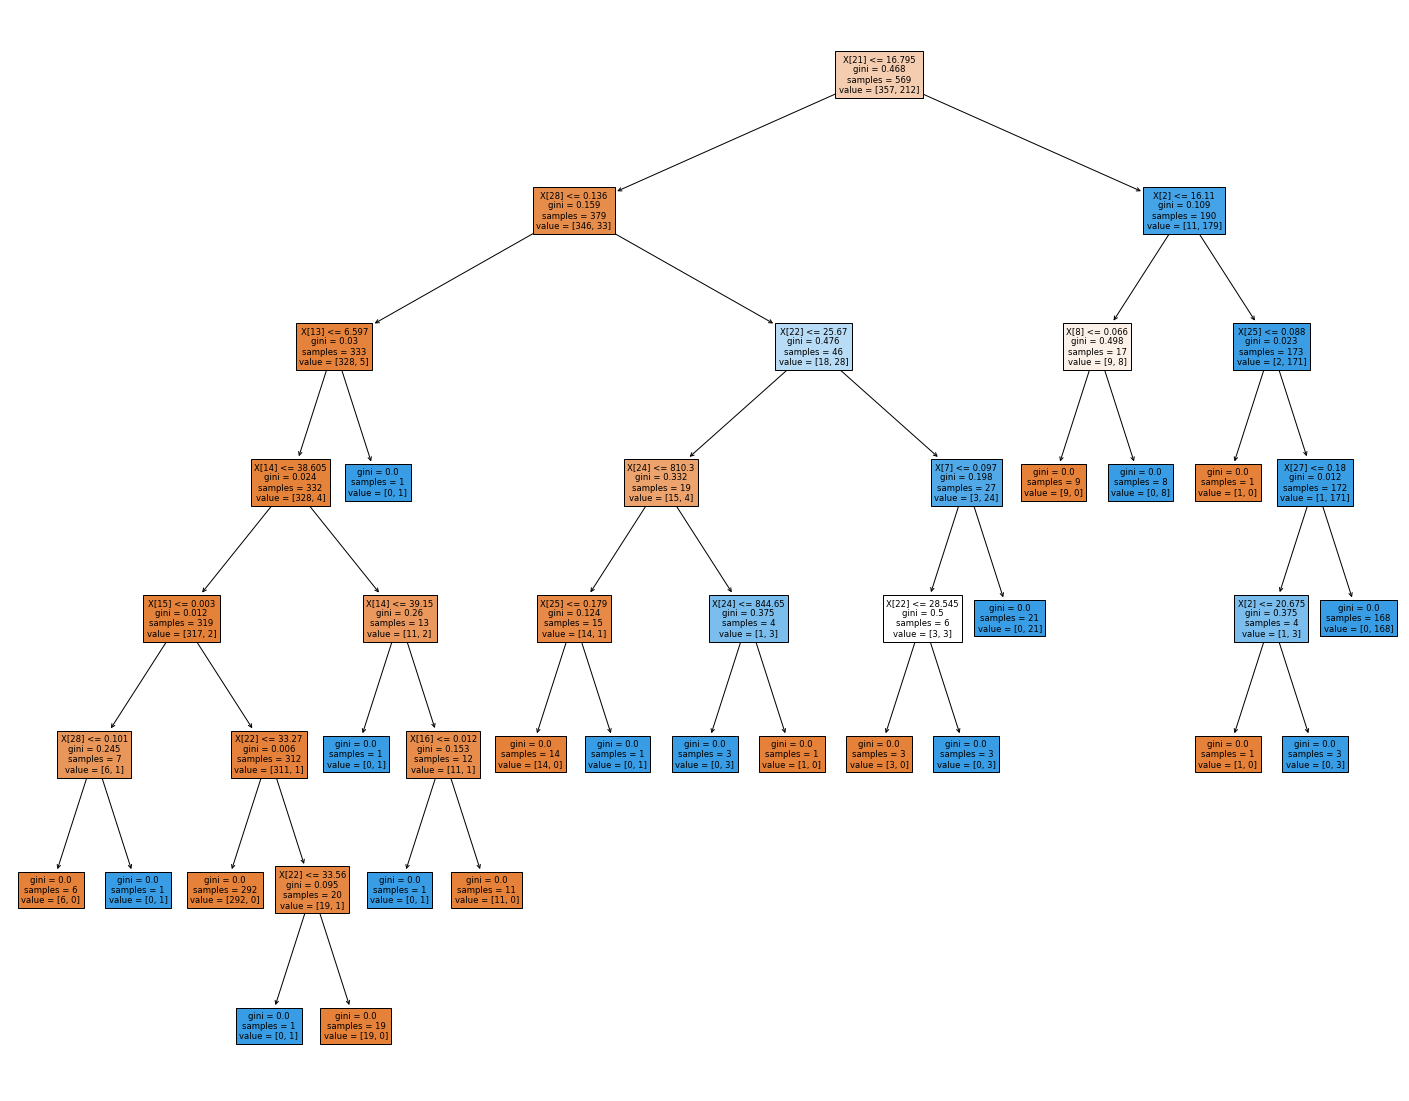

In [85]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
             filled=True)

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [94]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
classifier.score(X_test, y_test)

0.7256637168141593

In [96]:
# Calculating the score after feature scaling
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [97]:
classifier.score(X_test_sc, y_test)

0.9734513274336283

In [98]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

[[63  0]
 [ 3 47]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       1.00      0.94      0.97        50

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



In [99]:
error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

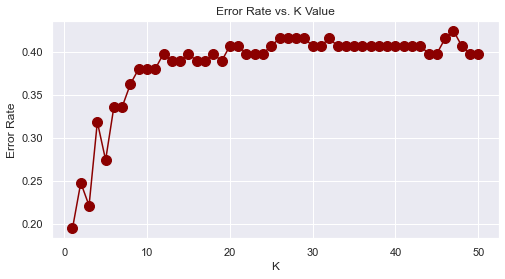

In [100]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.7256637168141593

In [101]:
# malignant = df[df['diagnosis']=='M']['area_mean']
# benign = df[df['diagnosis']=='B']['area_mean']fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.boxplot([malignant,benign], labels=['M', 'B'])

Text(0.5, 1.0, '')

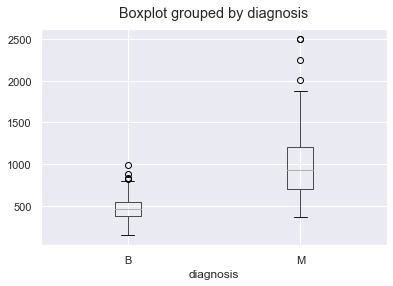

In [102]:
df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('')

In [109]:
pred3 = classifier.predict(patient1)

In [110]:
if pred3[0] == 1:
    print('Patient has Cancer (malignant)')
else:
    print('Patient has Cancer ( benign)')

Patient has Cancer (malignant)


# Analysis of Accuracy of Model

In [ ]:
AccuracyScore of KNN= 0.7256637168141593
AccuracyScore of Decision Tree= 0.9469026548672567
accuracy_score LogisticRegression=  0.5575221238938053

In [103]:
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X_train,y_train)
# y_pred=knn.predict(X_test)

In [104]:
# test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
# test_calc.rename(columns={0: 'predicted'}, inplace=True)

# test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
# df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
# print (df_table)

# print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
# print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
# print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

# p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
# r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
# print('f1 score: ', (2*p*r)/(p+r))